In [31]:
import torch
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import math

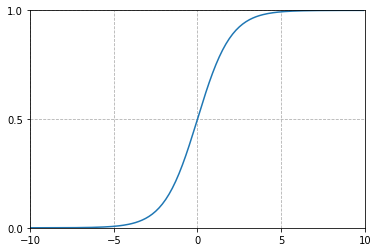

In [70]:
x = np.arange(-10, 10, 0.1)
y = 1/(1+np.exp(-x))

plt.xlim(-10, 10)
plt.ylim(0, 1.)
plt.plot(x, y)

plt.grid(linestyle='--')

x_stick = np.arange(-10, 11, 5)
y_stick = np.arange(0, 1.2, 0.5)

plt.xticks(x_stick)
plt.yticks(y_stick)

plt.savefig('1.sigmoid.png')

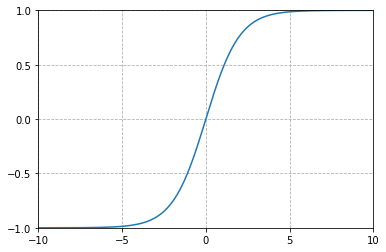

In [71]:
x = np.arange(-10, 10, 0.1)
y = (1-np.exp(-1 * x)) / (1+np.exp(-1 * x))

plt.xlim(-10, 10)
plt.ylim(-1, 1)
plt.plot(x, y)

plt.grid(linestyle='--')

x_stick = np.arange(-10, 11, 5)
y_stick = np.arange(-1.0, 1.5, 0.5)

plt.xticks(x_stick)
plt.yticks(y_stick)

plt.savefig('2.tanh.png')

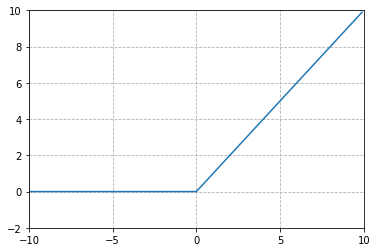

In [72]:
x = np.arange(-10, 10, 0.1)
y = np.where(x<0,0,x)

plt.xlim(-10, 10)
plt.ylim(-2, 10)

plt.grid(linestyle='--')

x_stick = np.arange(-10, 11, 5)
y_stick = np.arange(-2, 11, 2)

plt.xticks(x_stick)
plt.yticks(y_stick)
plt.plot(x, y)
plt.savefig('3.relu.png')

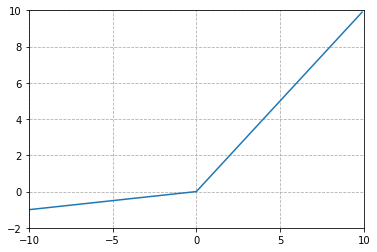

In [73]:
x = np.arange(-10, 10, 0.1)
y = np.maximum(0.1*x, x)

plt.xlim(-10, 10)
plt.ylim(-2, 10)

plt.grid(linestyle='--')

x_stick = np.arange(-10, 11, 5)
y_stick = np.arange(-2, 11, 2)

plt.xticks(x_stick)
plt.yticks(y_stick)
plt.plot(x, y)
plt.savefig('4.prelu.png')



In [2]:
def get_data(batch_size=16):
    x = torch.rand(batch_size, 1) * 5
    y = x * 2 + 3 + torch.randn(batch_size, 1)
    return x, y

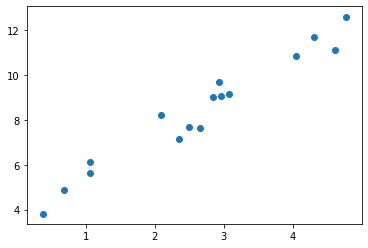

In [3]:
x, y = get_data()
plt.scatter(x.numpy(), y.numpy())

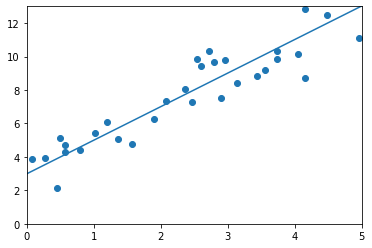

In [4]:
w = torch.rand(1, 1)
b = torch.zeros(1, 1)

lr = 0.01

for i in range(1000):
    x, y = get_data()
    
    # forward
    y_pred = x.mm(w) + b
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.mean()

    # backward
    dw = x.t().mm(y_pred - y) 
    db = (y_pred - y).sum()

    w.sub_(dw * lr)
    b.sub_(db * lr)
    
    # plot
    if i % 50 == 0:
        display.clear_output(wait=True)
        x = torch.arange(0, 6).view(-1, 1)
        y = x.float().mm(w) + b
        plt.plot(x.numpy(), y.numpy())
        
        x1, y1 = get_data(32)
        plt.scatter(x1.numpy(), y1.numpy())
        
        plt.xlim(0, 5)
        plt.ylim(0, 13)
        plt.show()
        plt.pause(0.5)

In [5]:
w.item(), b.item()

(2.173053741455078, 2.945833683013916)